<a href="https://colab.research.google.com/github/angelinannisa/machinelearning/blob/main/labassignmentweek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1
Import The Library and Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
data = pd.read_csv('insurance.csv')

Step 2
Understanding Data

In [4]:
# Viewing some initial data
data.head()

# Checking the data size
data.shape

# Information about the data
data.info()

# Data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Step 3
Encoding Process

In [6]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Step 4
Visualizing data by identifying variables to be used as independent (feature) variables and the target variable (personal medical expenses)

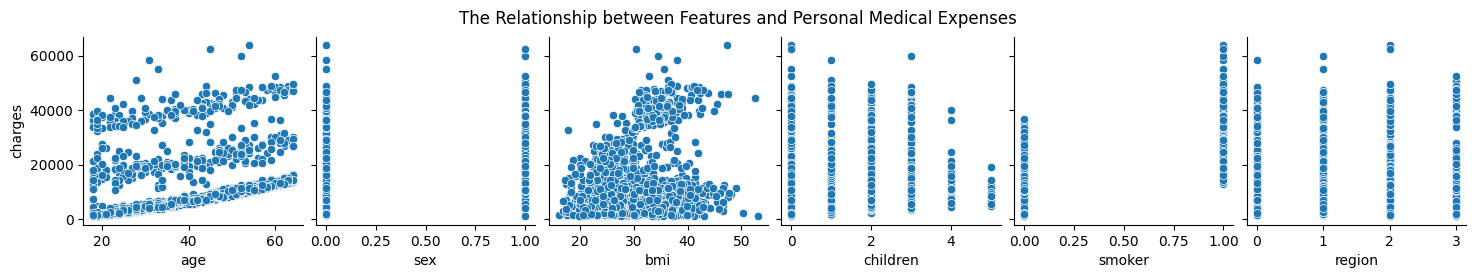

In [7]:
# Pairplot to see the relationship between independent variables and the target
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'], y_vars=['charges'])
plt.suptitle('The Relationship between Features and Personal Medical Expenses', y=1.07)

# Showing plot
plt.show()

Step 5
Splitting the dataset into training and testing data with an 80:20 ratio


In [8]:
from sklearn.model_selection import train_test_split
# Separate the independent variables (features) and the target variable.
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Split the dataset into training data (train) and test data (test) with a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6
Train the Model on the Training Data

In [9]:
from sklearn.linear_model import LinearRegression
# Creating a model object
model = LinearRegression()

# Training the model with the training data
model.fit(X_train, y_train)

LinearRegression()

Step 7
Making Predictions on Test Data

In [10]:
# To make predictions on the test data
y_pred = model.predict(X_test)

a. Scatter Plot


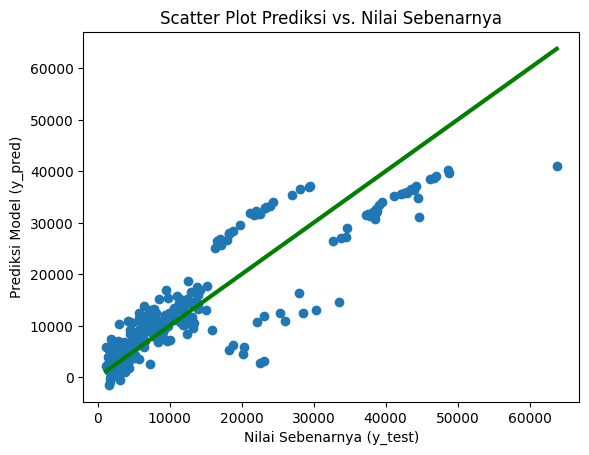

In [11]:
# Creating a scatter plot to compare predictions with actual values
plt.scatter(y_test, y_pred)
print('a. Scatter Plot')
plt.xlabel("Nilai Sebenarnya (y_test)")
plt.ylabel("Prediksi Model (y_pred)")
plt.title("Scatter Plot Prediksi vs. Nilai Sebenarnya")

# Adding a Regression Line (Diagonal Line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='-', linewidth=3)
plt.show()

b. Histogram Residual


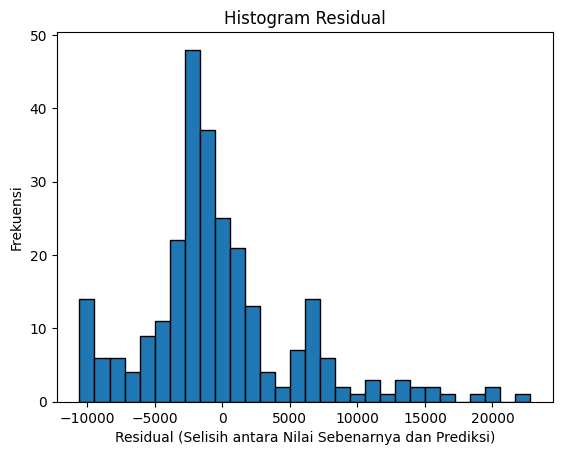

In [12]:
# Calculate residual
residuals = y_test - y_pred

# Making histogram residual
plt.hist(residuals, bins=30, edgecolor='k')
print('b. Histogram Residual')
plt.xlabel("Residual (Selisih antara Nilai Sebenarnya dan Prediksi)")
plt.ylabel("Frekuensi")
plt.title("Histogram Residual")
plt.show()

Step 8
Feature **Scaling**

In [13]:
# Feature Scaling
y = y.values.reshape(-1,1) # Changing 1D data to 2D with 1 column

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Step 9: Fitting SVR to Dataset

In [14]:
# Fitting SVR to Dataset
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

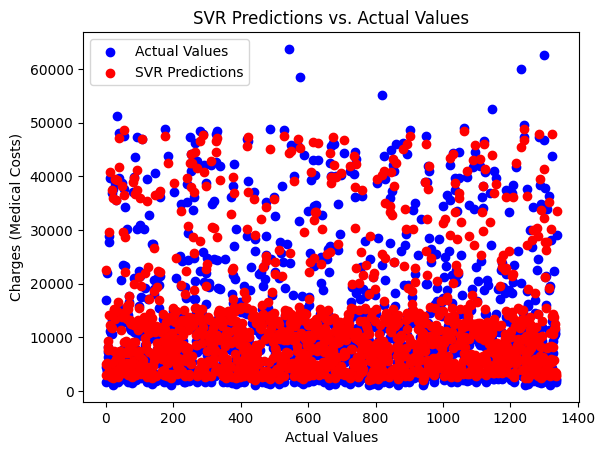

In [15]:
# Predicting on the training data
y_pred_scaled = svr.predict(X)

# Reshape the 1D array to 2D
y_pred_scaled_reshaped = y_pred_scaled.reshape(-1, 1)

# Inverse transform the reshaped scaled predictions
y_pred = sc_y.inverse_transform(y_pred_scaled_reshaped)

# Inverse transform the scaled actual values
y_actual = sc_y.inverse_transform(y)

# Plotting the prediction results vs. actual values
plt.scatter(range(len(y_actual)), y_actual, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='SVR Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Charges (Medical Costs)')
plt.legend()
plt.title('SVR Predictions vs. Actual Values')
plt.show()


Step 10
Evaluate SVR **Model**

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = svr.predict(X)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_actual, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_actual, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_actual, y_pred)

# Display R-squared, MAE, MSE, RMSE
print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R-squared: 0.8580074170742829
MAE: 0.2012858673534939
MSE: 0.14199258292571715
RMSE: 0.3768190320640893
